# Menyiapkan Library dan Dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('drive/My Drive/Datasets')
os.listdir('.')

['iris.csv', 'heart.csv', 'pima-indians-diabetes.csv', 'sonar.csv']

In [45]:
# membaca dataset
dataset_sonar = pd.read_csv('sonar.csv')
dataset_sonar.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1


# EDA dan Future Engineering

In [4]:
dataset_sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [5]:
dataset_sonar.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,

In [6]:
dataset_sonar['Class'].value_counts()

0    111
1     97
Name: Class, dtype: int64

In [7]:
dataset_sonar.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'Class'],
      dtype='object')

In [8]:
metrix_corr = dataset_sonar.corr()
metrix_corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
V1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,0.344058,0.210861,0.210722,0.256278,0.304878,0.239079,0.137845,0.041817,0.055227,0.156760,0.117663,-0.056973,-0.163426,-0.218093,-0.295683,-0.342865,-0.341703,-0.224340,-0.199099,-0.077430,-0.048370,-0.030444,-0.031939,0.031319,0.098118,0.080722,0.119565,0.209873,0.208371,0.099993,0.127313,0.213592,0.206057,0.157949,0.279968,0.319354,0.230343,0.203234,0.247560,0.269287,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,-0.271694
V2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,0.297065,0.194102,0.249596,0.273170,0.307599,0.261844,0.152170,0.042870,0.040911,0.102428,0.075255,-0.074157,-0.179365,-0.196469,-0.295302,-0.365749,-0.337046,-0.234386,-0.228490,-0.115301,-0.055862,-0.049683,-0.108272,-0.004247,0.115824,0.132611,0.169186,0.217494,0.186828,0.098350,0.188226,0.261345,0.186368,0.133018,0.285716,0.304247,0.255797,0.265279,0.313995,0.245868,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,-0.231238
V3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,0.274610,0.214807,0.258767,0.291724,0.285663,0.237017,0.201093,0.120587,0.099303,0.103117,0.063990,-0.026815,-0.073400,-0.085380,-0.214256,-0.291974,-0.263111,-0.256674,-0.290728,-0.197493,-0.106198,-0.109895,-0.170671,-0.099409,0.017053,0.053070,0.107530,0.130276,0.110499,0.074137,0.189047,0.233442,0.113920,0.071946,0.180734,0.173649,0.179528,0.234896,0.223074,0.081096,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,-0.192195
V4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,0.271881,0.175381,0.215754,0.286708,0.278529,0.248245,0.223203,0.194992,0.189405,0.188317,0.142271,0.036010,-0.029749,-0.102975,-0.206673,-0.291357,-0.294749,-0.256074,-0.300476,-0.236602,-0.190086,-0.169987,-0.164651,-0.083965,0.015200,0.039282,0.063486,0.089887,0.089346,0.045141,0.145241,0.144693,0.050629,-0.008407,0.087824,0.080012,0.046109,0.121065,0.133294,0.077925,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,-0.250638
V5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,0.231684,0.211657,0.299086,0.359062,0.318059,0.328725,0.326477,0.299266,0.340543,0.285737,0.205088,0.152897,0.073934,-0.000624,-0.067296,-0.125675,-0.169618,-0.214692,-0.283863,-0.273350,-0.214336,-0.173485,-0.200586,-0.140559,-0.086529,-0.073481,-0.064617,-0.008620,0.063408,0.061616,0.098832,0.125181,0.063706,0.031575,0.089202,0.081964,0.041419,0.084435,0.088128,0.066751,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,-0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V57,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,0.103405,0.030732,0.057870,0.190886,0.202511,0.191736,0.145708,0.056930,0.045204,0.066425,0.030943,-0.069909,-0.098291,-0.117429,-0.157967,-0.254240,-0.267069,-0.190854,-0.228155,-0.072976,-0.018733,0.010611,0.045806,0.106959,0.168361,0.189471,0.180789,0.156320,0.143131,0.105603,0.193532,0.157646,0.104120,0.108185,0.144281,0.162125,0.157815,0.196814,0.173098,0.201609,0.191407,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,-0.000933
V58,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,0.193358,0.065273,0.17114

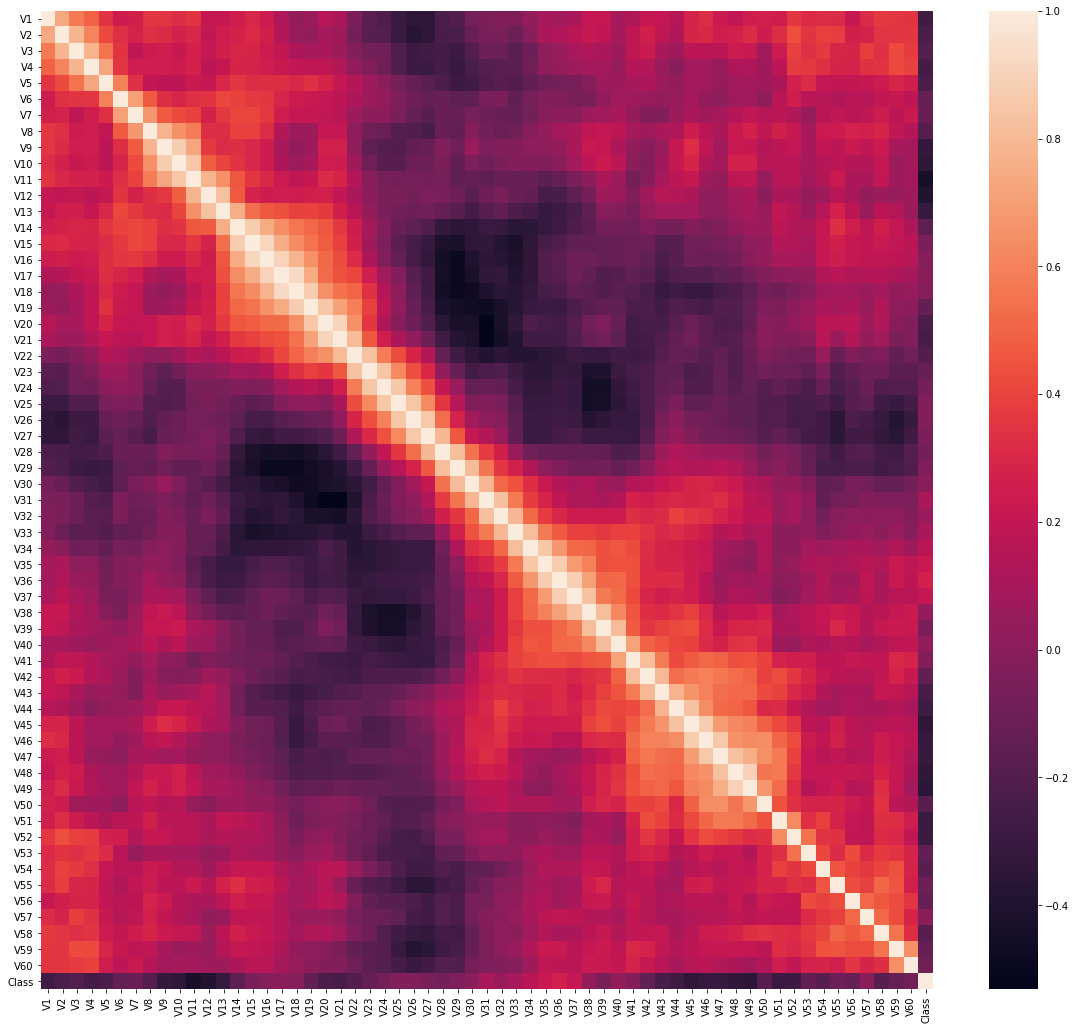

In [ ]:
plt.figure(figsize=(20,18))
sb.heatmap(metrix_corr)
plt.show()

In [46]:
# membagi dataset menjadi data feature dan data label 
feature = dataset_sonar.drop(['Class'], axis=1)
label = dataset_sonar['Class']

In [66]:
# melakukan scalling data feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature.values)

In [90]:
# membagi data test dan data training
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.2, random_state=160)

# Melatih dan Evaluasi Model

## DecisionTreeClassifier

In [91]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(feature_train, label_train)

# membuat prediksi data feature test
feature_pred = tree_model.predict(feature_test)

# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(round(score.mean(), 2))

0.72


In [92]:
from sklearn.metrics import classification_report
report_tree = classification_report(label_test, feature_pred)
print(report_tree)

              precision    recall  f1-score   support

           0       0.75      0.65      0.70        23
           1       0.64      0.74      0.68        19

    accuracy                           0.69        42
   macro avg       0.69      0.69      0.69        42
weighted avg       0.70      0.69      0.69        42



In [93]:
from sklearn.metrics import confusion_matrix
cm_tree = confusion_matrix(label_test, feature_pred, labels=[0,1])
print(cm_tree) 

[[15  8]
 [ 5 14]]


## LogisticRegression

In [94]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(feature_train, label_train)

# membuat prediksi data feature test
feature_pred = lr_model.predict(feature_test)

# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(round(score.mean(), 2))

0.84


In [95]:
from sklearn.metrics import classification_report
report_lr = classification_report(label_test, feature_pred)
print(report_lr)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.76      0.84      0.80        19

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



In [96]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(label_test, feature_pred, labels=[0,1])
print(cm_lr)

[[18  5]
 [ 3 16]]


## RandomForestClassifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=500, max_depth=15, criterion='gini', max_features='auto')
rfc_model.fit(feature_train, label_train)

# membuat prediksi data feature test
feature_pred = rfc_model.predict(feature_test)

# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score_rfc = cross_val_score(rfc_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(round(score_rfc.mean(), 2))

0.94


In [98]:
from sklearn.metrics import classification_report
report_rfc = classification_report(label_test, feature_pred)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.75      0.79      0.77        19

    accuracy                           0.79        42
   macro avg       0.78      0.79      0.78        42
weighted avg       0.79      0.79      0.79        42



In [99]:
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(label_test, feature_pred, labels=[0,1])
print(cm_rfc)

[[18  5]
 [ 4 15]]


## KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(feature_train, label_train)

feature_pred = knn_model.predict(feature_test)

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(f'Nilai rata_rata cross_validation data train adalah: {round(score.mean(), 2)}')

Nilai rata_rata cross_validation data train adalah: 0.89


In [127]:
from sklearn.metrics import classification_report
report_svc = classification_report(label_test, feature_pred)
print(report_svc)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.80      0.84      0.82        19

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



In [128]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, feature_pred, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[19  4]
 [ 3 16]]


## SVC

In [122]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=10, gamma='scale')
svc_model.fit(feature_train, label_train)

# membuat prediksi data feature test
feature_pred = svc_model.predict(feature_test)

# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score = cross_val_score(svc_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(round(score.mean(),2))

0.95


In [101]:
from sklearn.metrics import classification_report
report_svc = classification_report(label_test, feature_pred)
print(report_svc)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.95      0.95      0.95        19

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



In [102]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, feature_pred, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[22  1]
 [ 1 18]]


# Kesimpulan:
- Algoritma yang saya pakai diatas merupakan yang terbaik yang telah saya coba atur tuning hyperparameternya
- Dari beberapa model yang dilatih yang memiliki hasil yang mendekati akurat atau bagus yaitu model dengan algoritma *SVC*
- Dari hasil model dengan algoritma SVC dapat dilihat bahwa cros_validation data trainingnya mencapai 0.95 dengan hasil f1_score 0.95, recall 0.95 dan precision 0.95 berarti hasil akurasi data testing mendekati hasil data training (akurasi bagus)
- Hasil akurasi bagus tersebut dapat dilihat dari confusion matrik yang memprediksi TP, FP, TN, FN dimana memprediksi label_test kategori 0 (batu) hampir keseluruhan benar (22 True dan 1 False) sedangkan label_test kategori 1 (metal) juga prediksi benarnya lebih banyak (18 True 1 False).
